In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

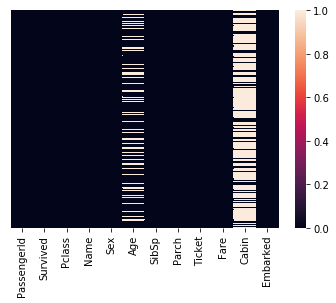

In [11]:
import seaborn as sns
sns.heatmap(train.isnull(), yticklabels=False)

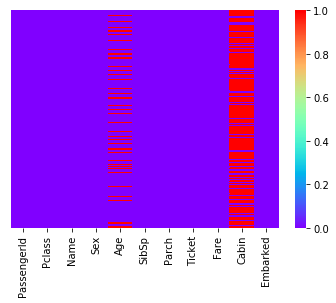

In [12]:
sns.heatmap(test.isnull(), yticklabels=False, cmap='rainbow')

In [13]:
categorical_features = [features for features in train.columns if train[features].dtypes == 'O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

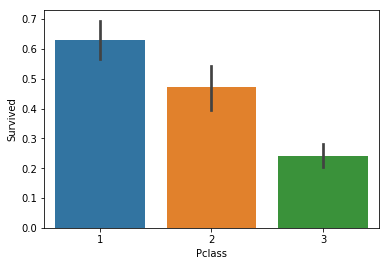

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train)

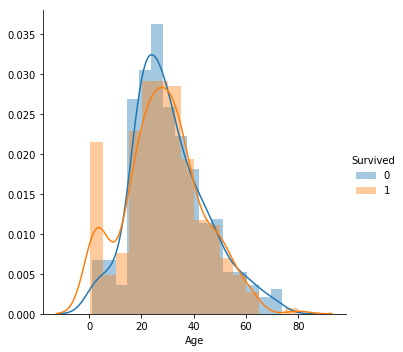

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.FacetGrid(train, hue='Survived', height=5).map(sns.distplot, 'Age').add_legend()
plt.show()

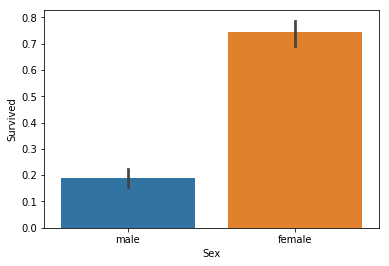

In [16]:
sns.barplot(x='Sex', y='Survived', data=train)

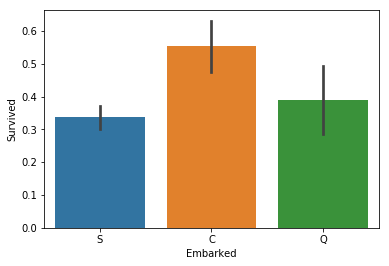

In [17]:
sns.barplot(x = 'Embarked', y = 'Survived', data=train)

C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


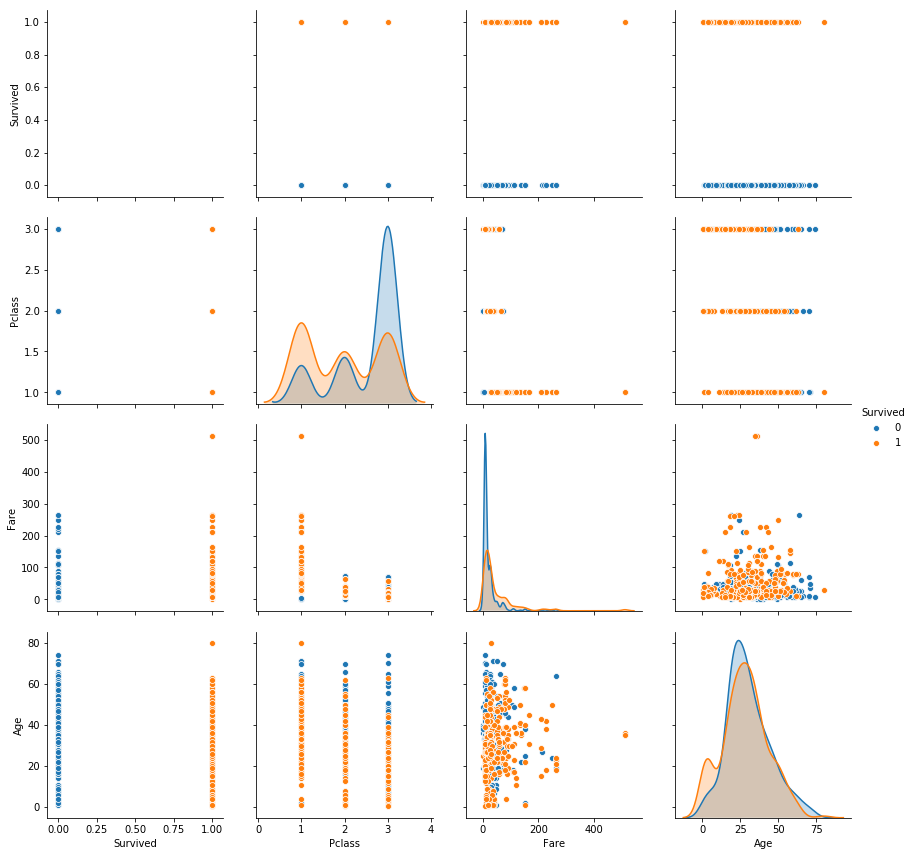

In [18]:
sns.pairplot(train[['Survived' ,'Pclass', 'Fare', 'Age']], hue='Survived', height=3);
plt.show()

In [19]:
y_train = train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [21]:
ntrain, ntest

(891, 418)

In [22]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
all_data.shape

C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(1309, 11)

In [23]:
all_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [24]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450


In [25]:
age_by_pclass_sex = all_data.groupby(['Sex', 'Pclass']).median()['Age']
all_data['Age'] = all_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
all_data['Age'].isnull().sum()

0

In [26]:
mode = all_data['Embarked'].mode()
all_data['Embarked'] = all_data['Embarked'].fillna('mode')

In [27]:
med_fare = all_data.groupby(['Pclass' ,'Parch', 'SibSp']).Fare.median()[3][0][0]
med_fare

7.8542

In [28]:
all_data['Fare'] = all_data['Fare'].fillna(med_fare)

In [29]:
all_data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [30]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
all_data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [31]:
all_data['FarePerPerson'] = all_data['Fare'] / all_data['Family_size']
all_data['FarePerPerson'].head()

0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: FarePerPerson, dtype: float64

In [32]:
all_data.drop(['Parch', 'SibSp', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
all_data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Family_size,Title,FarePerPerson
0,22.0,S,7.2500,1,3,male,2,Mr,3.62500
1,38.0,C,71.2833,2,1,female,2,Mrs,35.64165
2,26.0,S,7.9250,3,3,female,1,Miss,7.92500
3,35.0,S,53.1000,4,1,female,2,Mrs,26.55000
4,35.0,S,8.0500,5,3,male,1,Mr,8.05000


In [33]:
all_data = all_data.drop(['Fare'], axis=1)

In [34]:
categorical_features=[features for features in all_data.columns if all_data[features].dtypes=='O']
categorical_features

['Embarked', 'Sex', 'Title']

In [35]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(all_data['Title'].values))
all_data['Title'] = lbl.transform(list(all_data['Title'].values))

lbl.fit(list(all_data['Embarked'].values))
all_data['Embarked'] = lbl.transform(list(all_data['Embarked'].values))

lbl.fit(list(all_data['Sex'].values))
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

all_data.head()

,Age,Embarked,PassengerId,Pclass,Sex,Family_size,Title,FarePerPerson
0,22.0,2,1,3,1,2,12,3.62500
1,38.0,0,2,1,0,2,13,35.64165
2,26.0,2,3,3,0,1,9,7.92500
3,35.0,2,4,1,0,2,13,26.55000
4,35.0,2,5,3,1,1,12,8.05000


In [36]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [37]:
train.corr()

,Age,Embarked,PassengerId,Pclass,Sex,Family_size,Title,FarePerPerson
Age,1.000000,-0.005409,0.038742,-0.417667,0.101354,-0.258986,0.287455,0.180237
Embarked,-0.005409,1.000000,0.013083,0.157112,0.104057,0.064701,0.072720,-0.228555
PassengerId,0.038742,0.013083,1.000000,-0.035144,0.042939,-0.040143,0.033879,0.026303
Pclass,-0.417667,0.157112,-0.035144,1.000000,0.131900,0.065997,0.032520,-0.485079
Sex,0.101354,0.104057,0.042939,0.131900,1.000000,-0.200988,0.245085,-0.115143
Family_size,-0.258986,0.064701,-0.040143,0.065997,-0.200988,1.000000,-0.196715,-0.099173
Title,0.287455,0.072720,0.033879,0.032520,0.245085,-0.196715,1.000000,-0.051322
FarePerPerson,0.180237,-0.228555,0.026303,-0.485079,-0.115143,-0.099173,-0.051322,1.000000


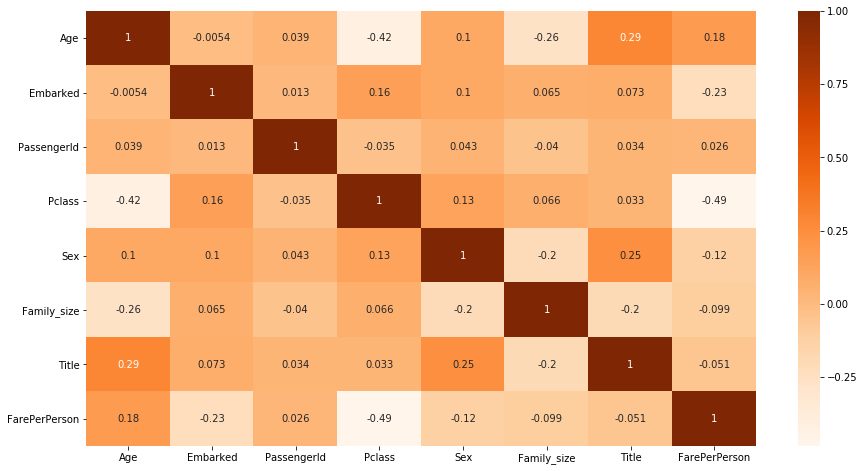

In [38]:
plt.subplots(figsize=(15,8))

sns.heatmap(train.corr(),annot=True,cmap='Oranges')

In [39]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier()

In [40]:
X = train
rd.fit(X, y_train)

C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
yfit = rd.predict(test)
yfit

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
ytest = pd.read_csv('datasets/gender_submission.csv')
ytest.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
ytest_dict = ytest['Survived'].to_dict()

In [51]:
l = []
for key, val in ytest_dict.items():
    l.append(val)

In [52]:
ytest = np.array(l)
ytest

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit, ytest)

0.7870813397129187

In [55]:
Submission = pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = yfit
Submission.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [56]:
Submission = Submission.set_index('PassengerId')
Submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [57]:
Submission.to_csv("Submission.csv")